In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay
from sklearn.svm import SVR
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/home/hp/Documents/dataset/Health_insurance/train.csv')
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [27]:
df.shape

(50882, 14)

In [28]:
df.size

712348

In [29]:
df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [30]:
for features in df.columns:
    print("{} has {} unique no's".format(features,df[features].nunique()))

ID has 50882 unique no's
City_Code has 36 unique no's
Region_Code has 5316 unique no's
Accomodation_Type has 2 unique no's
Reco_Insurance_Type has 2 unique no's
Upper_Age has 58 unique no's
Lower_Age has 60 unique no's
Is_Spouse has 2 unique no's
Health Indicator has 9 unique no's
Holding_Policy_Duration has 15 unique no's
Holding_Policy_Type has 4 unique no's
Reco_Policy_Cat has 22 unique no's
Reco_Policy_Premium has 6977 unique no's
Response has 2 unique no's


In [31]:
df.duplicated().sum()

0

In [32]:
for i in range(len(df.isna().sum())):
    if df.isna().sum()[i]>0:
        print('Total number of missing values in '+df.isna().sum().index[i]+":",df.isna().sum()[i])

Total number of missing values in Health Indicator: 11691
Total number of missing values in Holding_Policy_Duration: 20251
Total number of missing values in Holding_Policy_Type: 20251


In [33]:
df.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [34]:
df['Health Indicator'].fillna(df['Health Indicator'].mode()[0],inplace=True)
df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].mode()[0],inplace=True)
df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].mean(),inplace=True)

In [35]:
df['Holding_Policy_Type']=df['Holding_Policy_Type'].astype(int) 
df.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type          int64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

In [36]:
df.isna().sum().any()

False

In [37]:
df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,1.0,2,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1,16,10404.0,0


In [38]:
df.drop(df.columns[0:3],axis=1,inplace=True)

In [39]:
df.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,Rented,Individual,36,36,No,X1,14+,3,22,11628.0,0
1,Owned,Joint,75,22,No,X2,1.0,2,22,30510.0,0
2,Owned,Individual,32,32,No,X1,1.0,1,19,7450.0,1
3,Owned,Joint,52,48,No,X1,14+,3,19,17780.0,0
4,Rented,Individual,44,44,No,X2,3.0,1,16,10404.0,0


<AxesSubplot:>

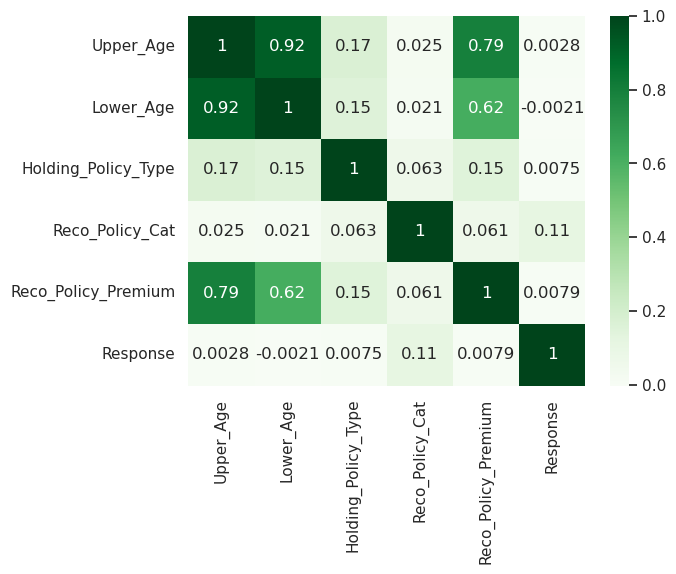

In [40]:
sns.set()
sns.heatmap(data=df.corr(),annot=True,cmap='Greens')

In [41]:
df.corr()

,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
Upper_Age,1.000000,0.921392,0.173166,0.025257,0.792689,0.002772
Lower_Age,0.921392,1.000000,0.152318,0.021163,0.615739,-0.002099
Holding_Policy_Type,0.173166,0.152318,1.000000,0.063071,0.147772,0.007465
Reco_Policy_Cat,0.025257,0.021163,0.063071,1.000000,0.060989,0.114321
Reco_Policy_Premium,0.792689,0.615739,0.147772,0.060989,1.000000,0.007943
Response,0.002772,-0.002099,0.007465,0.114321,0.007943,1.000000


<AxesSubplot:xlabel='Accomodation_Type', ylabel='Response'>

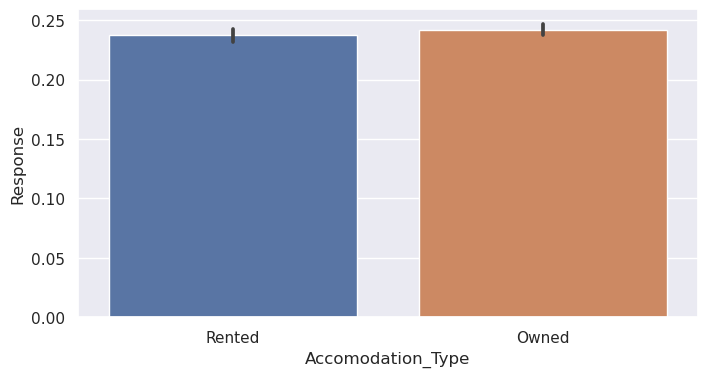

In [42]:
plt.figure(figsize=(8,4))
sns.barplot(x='Accomodation_Type',y='Response',data=df)

<Figure size 400x200 with 0 Axes>

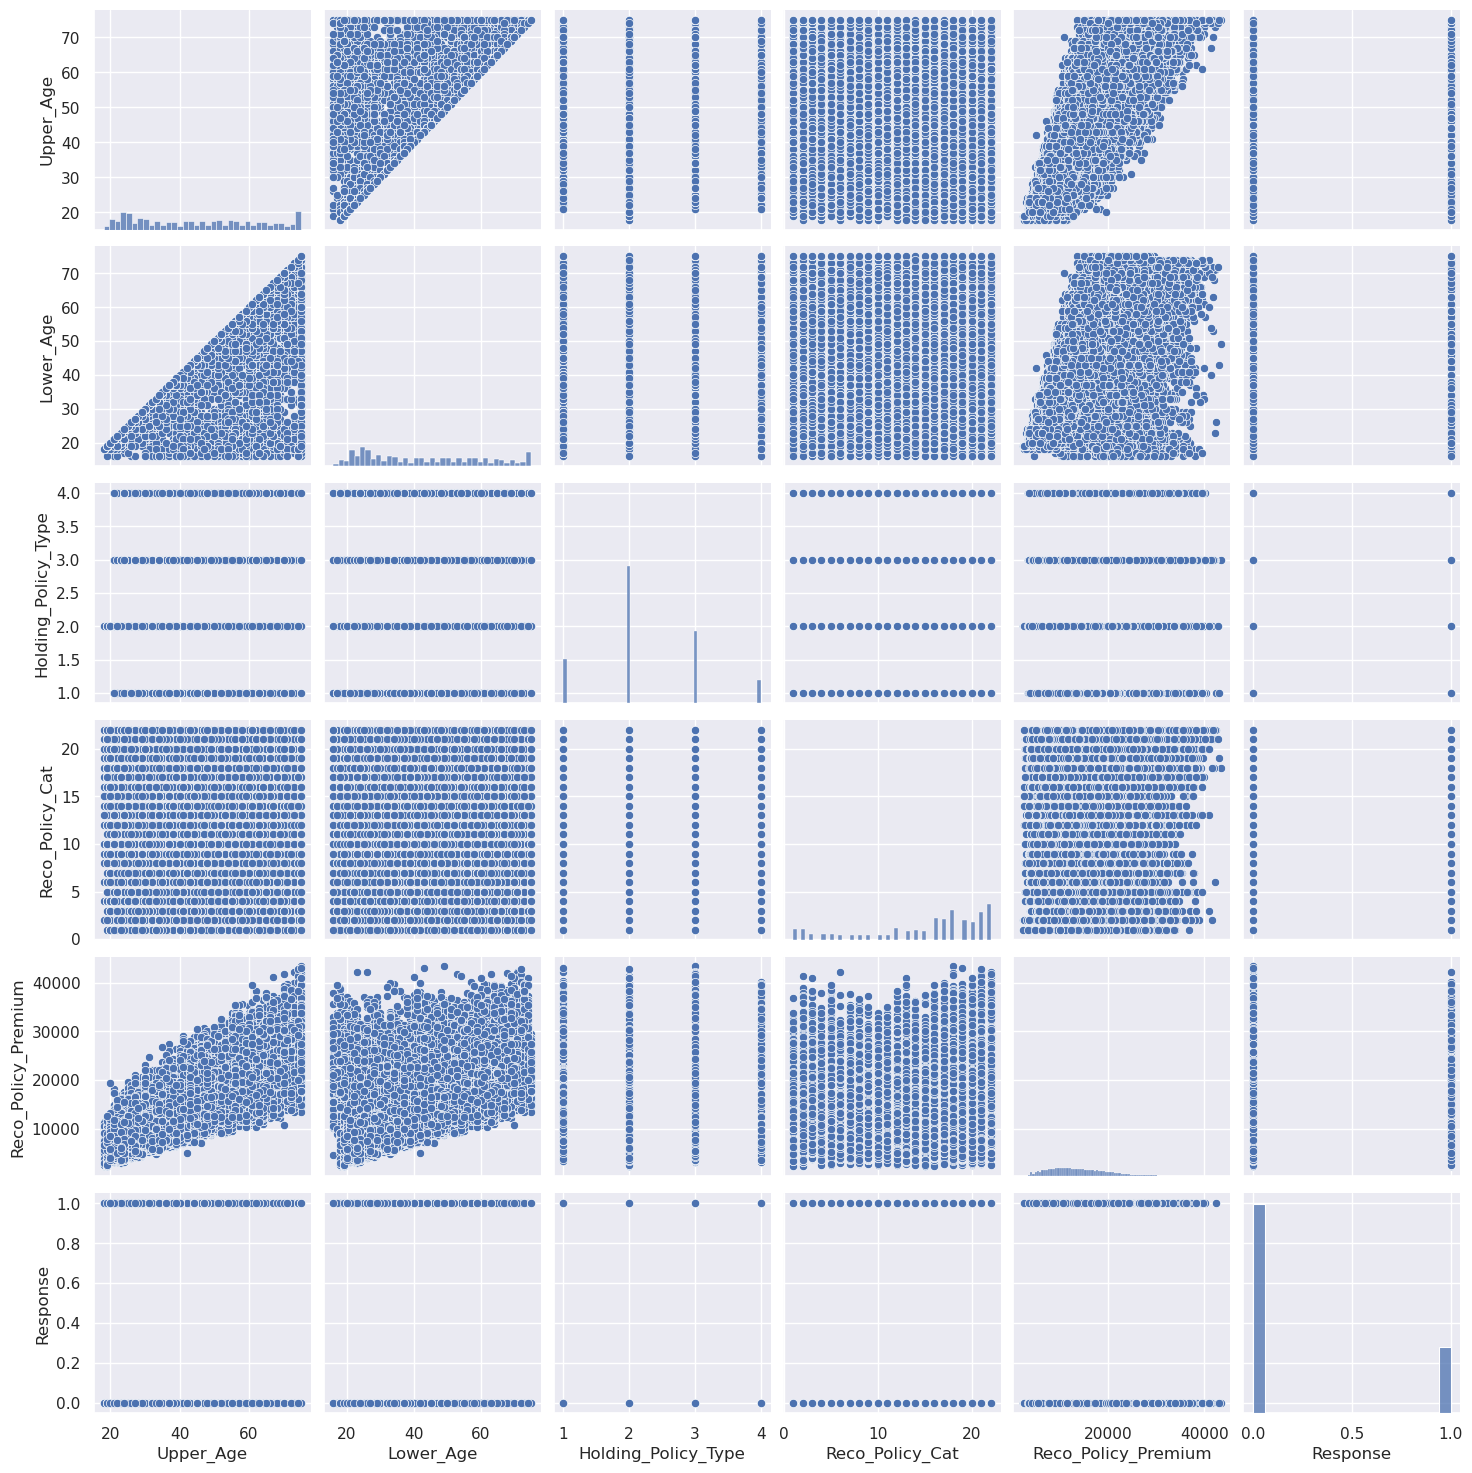

In [43]:
plt.figure(figsize=(4,2))
sns.pairplot(data=df)

# Encoding Data's

In [44]:
le=LabelEncoder()
df['Accomodation_Type']=le.fit_transform(df['Accomodation_Type'])
df['Reco_Insurance_Type']=le.fit_transform(df['Reco_Insurance_Type'])
df['Is_Spouse']=le.fit_transform(df['Is_Spouse'])
df['Health Indicator']=le.fit_transform(df['Health Indicator'])
df['Holding_Policy_Duration']=le.fit_transform(df['Holding_Policy_Duration'])

In [45]:
df.head(10)

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,0,36,36,0,0,5,3,22,11628.0,0
1,0,1,75,22,0,1,0,2,22,30510.0,0
2,0,0,32,32,0,0,0,1,19,7450.0,1
3,0,1,52,48,0,0,5,3,19,17780.0,0
4,1,0,44,44,0,1,8,1,16,10404.0,0
5,1,0,52,52,0,1,10,1,22,15264.0,1
6,0,0,28,28,0,0,0,2,17,10640.0,0
7,0,1,75,73,1,3,14,4,17,29344.0,1
8,0,1,52,43,0,0,6,3,1,27283.2,0
9,0,1,59,26,1,0,12,4,18,21100.8,1


# Training Data's

In [46]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
y

array([0, 0, 1, ..., 0, 1, 0])

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print(x.shape,x_train.shape,x_test.shape)

(50882, 10) (40705, 10) (10177, 10)


In [48]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
x_test

array([[ 1.10139466, -0.50525349, -1.1466759 , ..., -0.32000165,
        -0.17451055, -1.07913382],
       [ 1.10139466, -0.50525349, -1.26206266, ..., -0.32000165,
         1.0843808 , -1.53123296],
       [ 1.10139466,  1.97920452, -1.08898252, ...,  0.89360751,
        -0.33187196,  0.34591654],
       ...,
       [ 1.10139466, -0.50525349, -0.97359577, ..., -0.32000165,
         0.14021229, -1.24375359],
       [ 1.10139466, -0.50525349,  1.27644596, ..., -1.5336108 ,
         0.92701938,  0.33526467],
       [-0.90793976, -0.50525349, -1.37744941, ...,  0.89360751,
         0.61229654, -1.29277638]])

In [49]:
svr = SVR()
svr.fit(x_train, y_train)
y_pred_svr=svr.predict(x_test)
svr.score(x_train,y_train)

-0.10235160135828725

In [50]:
roc_auc_score(y, svr.predict(x))

0.5

In [51]:
models=[KNeighborsClassifier(n_neighbors=11),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=accuracy_score(y_test,y_pred)*100
    print("{}:{}".format(model,score),end='\n\n')

KNeighborsClassifier(n_neighbors=11):73.76437063967771

GaussianNB():75.54289083226884

SVC():75.54289083226884

DecisionTreeClassifier():64.91107399037044

RandomForestClassifier():73.35167534636926



              precision    recall  f1-score   support

           0       0.76      0.96      0.85      7688
           1       0.29      0.05      0.09      2489

    accuracy                           0.74     10177
   macro avg       0.52      0.51      0.47     10177
weighted avg       0.64      0.74      0.66     10177



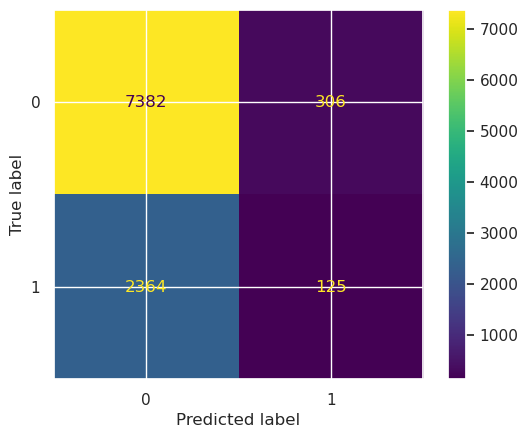

In [52]:
# KNN
model1=models[0]
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
report=classification_report(y_test,y_pred1)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_pred1)
print(report)
cmd

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      7688
           1       0.29      0.31      0.30      2489

    accuracy                           0.65     10177
   macro avg       0.53      0.53      0.53     10177
weighted avg       0.66      0.65      0.65     10177



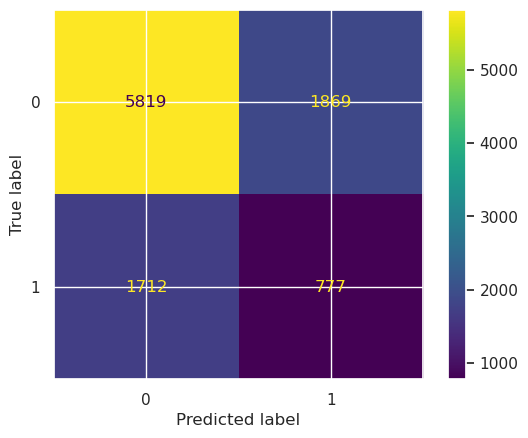

In [53]:
# Naive Bayes
model2=model[1]
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
report2=classification_report(y_test,y_pred2)
cmd2=ConfusionMatrixDisplay.from_predictions(y_test,y_pred2)
print(report2)
cmd2

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      7688
           1       0.29      0.29      0.29      2489

    accuracy                           0.65     10177
   macro avg       0.53      0.53      0.53     10177
weighted avg       0.65      0.65      0.65     10177



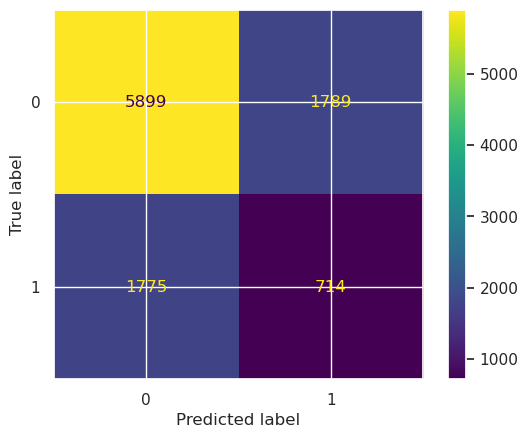

In [54]:
# SVM
model3=model[2]
model3.fit(x_train,y_train)
y_pred3=model3.predict(x_test)
report3=classification_report(y_test,y_pred3)
cmd3=ConfusionMatrixDisplay.from_predictions(y_test,y_pred3)
print(report3)
cmd3

              precision    recall  f1-score   support

           0       0.77      0.76      0.76      7688
           1       0.28      0.29      0.28      2489

    accuracy                           0.64     10177
   macro avg       0.52      0.52      0.52     10177
weighted avg       0.65      0.64      0.65     10177



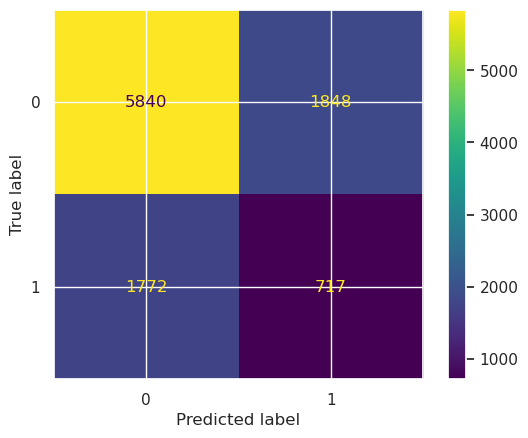

In [55]:
# Decisiontree Classifier
model4=model[3]
model4.fit(x_train,y_train)
y_pred4=model4.predict(x_test)
report4=classification_report(y_test,y_pred4)
cmd4=ConfusionMatrixDisplay.from_predictions(y_test,y_pred4)
print(report4)
cmd4

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      7688
           1       0.28      0.28      0.28      2489

    accuracy                           0.65     10177
   macro avg       0.52      0.52      0.52     10177
weighted avg       0.65      0.65      0.65     10177



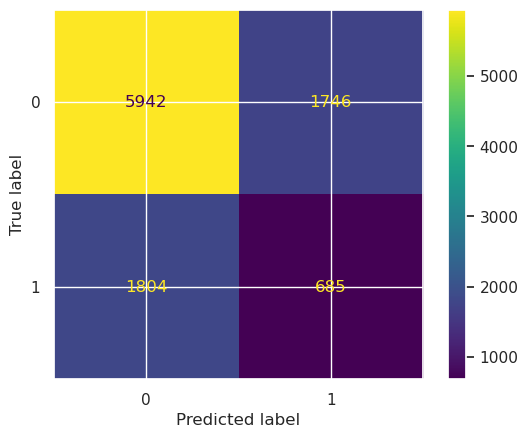

In [56]:
# Randomforest Classiifer
model5=model[4]
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)
report5=classification_report(y_test,y_pred5)
cmd5=ConfusionMatrixDisplay.from_predictions(y_test,y_pred5)
print(report5)
cmd5

From the above analysis it could be interpreted that the model's of SVC and Gaussian seems to provide much accurate results than the other model's.